# Fisheye Camera Calibration


### Setup


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob


In [ ]:
# termination criteria
subpix_criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

nx = 9 #number of inside corners in x
ny = 6 #number of inside corners in y

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny, 1, 3), np.float32)
objp[:, 0, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('../assets/sample_images/left_*.jpg')


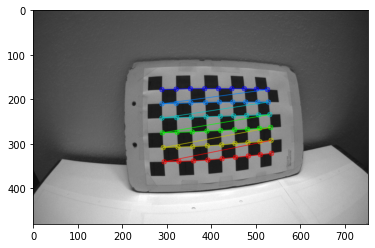

In [ ]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        win_size = (11, 11) # Change 'win_size' for accuracy. Default is (11, 11).
        corners = cv.cornerSubPix(gray, corners, win_size, (-1, -1), subpix_criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        

### Calibrate


In [ ]:
N_OK = len(objpoints)
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
calibration_flags = cv.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv.fisheye.CALIB_CHECK_COND + cv.fisheye.CALIB_FIX_SKEW
calibration_criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 1e-6)

mtx = np.zeros((3, 3))
dist = np.zeros((4, 1))
rms, _, _, _, _ = cv.fisheye.calibrate(objpoints, imgpoints, gray.shape[::-1], mtx, dist, rvecs, tvecs, calibration_flags, calibration_criteria)

print("RMS value = ", rms)


RMS value =  0.13687352217252324


### Undistortion


In [ ]:
img = cv.imread('../assets/sample_images/left_12.jpg')

map1, map2 = cv.fisheye.initUndistortRectifyMap(mtx, dist, np.eye(3), mtx, gray.shape[::-1], cv.CV_16SC2)

undistorted = cv.remap(img, map1, map2, interpolation = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)


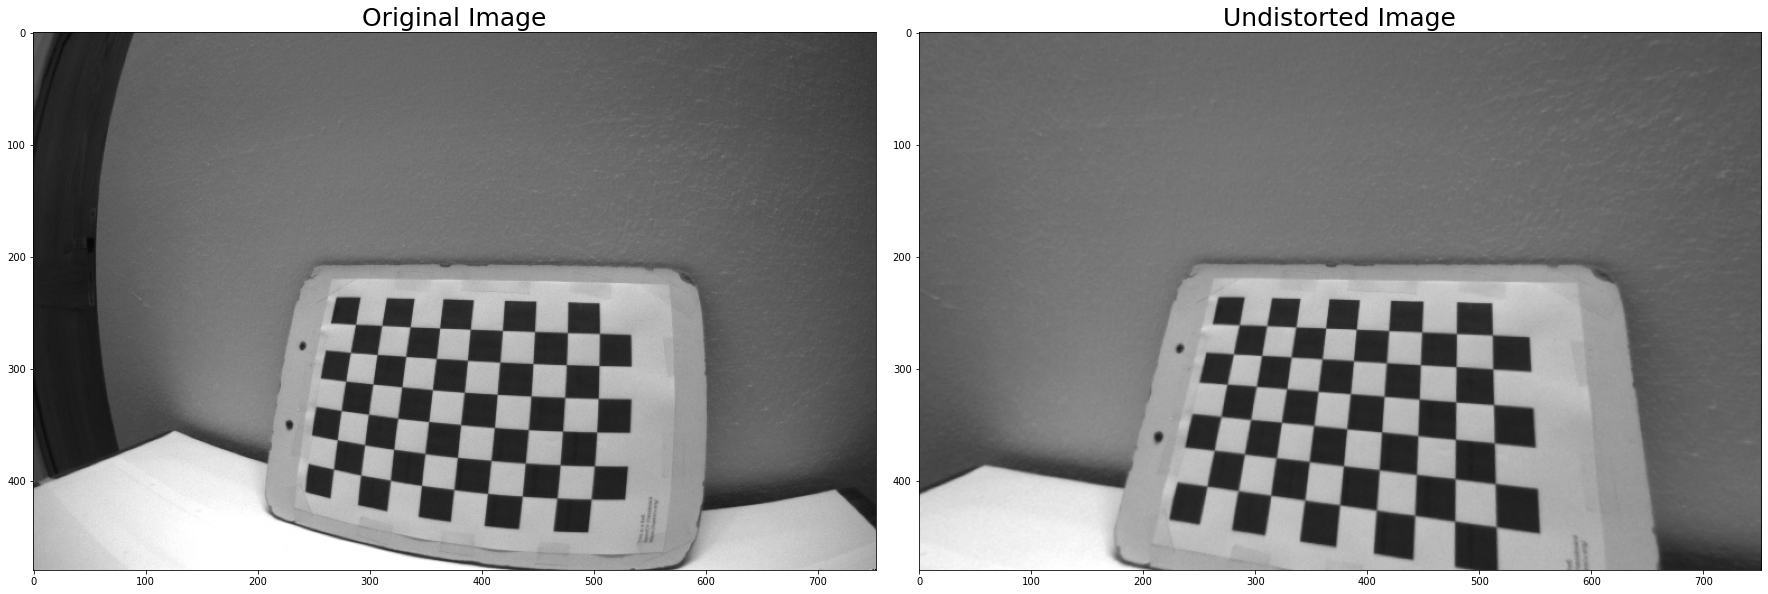

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize = 25)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize = 25)
plt.subplots_adjust(left = 0., right = 1, top = 0.9, bottom = 0.)
